# Deep Learning

A basic implementation of clustering using K-means. 

## Goal

Compress the following .png image: 

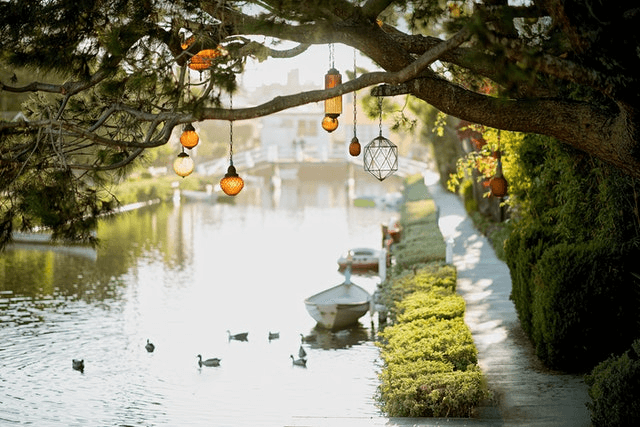

## Variables

**X<sub>j0</sub>**: Quantity of red in the j-ith pixel (0-255)  
**X<sub>j1</sub>**: Quantity of green in the j-ith pixel (0-255)  
**X<sub>j2</sub>**: Quantity of blue in the j-ith pixel (0-255)  
**X<sub>j4</sub>**: Quantity of alpha in the j-ith pixel (0-255)

## Result

**C<sub>i0</sub>**: Quantity of red in the i-ith centroid (0-255)  
**C<sub>i1</sub>**: Quantity of green in the i-ith centroid (0-255)  
**C<sub>i2</sub>**: Quantity of blue in the i-ith centroid (0-255)  
**C<sub>i4</sub>**: Quantity of alpha in the i-ith centroid (0-255)

In total, there will be 16 centroids calculate.

## Inituition

The original image has thousands of pixels, each containing 32 bits (8 bits for red, 8 bits for green, 8 bits for blue, 8 bits for alpha). One way to compress this image is to reduce the image to have way less colors variations, in our case, 16. So, after compressing we are gonna have a dictionary to store the 16 colors variations and, for each pixel, we will have 4 bits (instead of the 32 bits) indicating which color on the dictionary it uses. 

## Credits

This problem was taken from the <a href="https://www.coursera.org/specializations/machine-learning-introduction?" target="_blank">Machine Learning Specialization</a> offered by Stanford University at Coursera. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(len(idx)):
        lowest_distance_k = -1
        lowest_distance = -1
        for k in range(K):
            distance_k = np.sum((centroids[k] - X[i]) ** 2);
            if (lowest_distance_k == -1 or distance_k < lowest_distance):
                lowest_distance = distance_k
                lowest_distance_k = k
        idx[i] = lowest_distance_k
            
    return idx

In [3]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in range(K):
        ck_len = 0
        for j in range(m):
            if idx[j] == i:
                centroids[i] += X[j]
                ck_len += 1
        if ck_len > 0:
            centroids[i] = centroids[i] / ck_len

    return centroids

In [4]:
def show_centroids_colors(centroids):
    pallete = np.expand_dims(centroids, axis = 0)
    num = np.arange(0, len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(pallete)

In [5]:
def compute_cost(X, idx, centroids):
    m, n = X.shape
    cost = 0.0

    for i in range(len(idx)):
        centroid = centroids[idx[i]]
        cost += np.sum((X[i] - centroid) ** 2)

    cost = cost / m
    
    return cost

In [6]:
def run_kMeans(X, initial_centroids, idx, max_iters = 10, logging = True):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids

    for i in range(max_iters):  
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

        if logging == True:
            cost = compute_cost(X, idx, centroids)
            print(f"K-Means iteration {i}/{max_iters - 1} | Cost {cost:.4f}");

    return centroids, idx

In [7]:
def init_centroids(X, K, max_iters = 3):
    best_centroids = np.zeros((K, X.shape[1]))
    best_centroids_idx = np.zeros(X.shape[0])
    best_centroids_cost = float('inf')

    for i in range(max_iters):
        randidx = np.random.permutation(X.shape[0])
        centroids = X[randidx[:K]]
        centroids, idx = run_kMeans(X, centroids, randidx, 1, False)
        cost = compute_cost(X, idx, centroids)

        if cost < best_centroids_cost:
            best_centroids_cost = cost
            best_centroids = centroids
            best_centroids_idx = randidx

        print(f"init_centroids iteration {i}/{max_iters - 1} | Best cost so far: {best_centroids_cost:.4f}");
        

    return best_centroids, best_centroids_idx

(427, 640, 4)


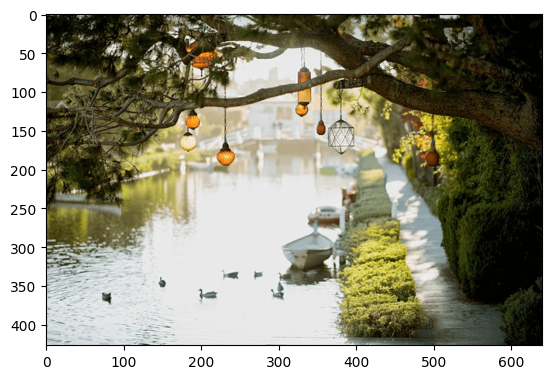

In [8]:
original_img = plt.imread('images/pendant-lamp-over-river.png')

print(original_img.shape)
plt.imshow(original_img)

## Let's try some initial centroids

The code below reshapes the image pixels (x, y) to a linear form. After that, we run 3 iterations of the initial_centroids. The goal here is to have 3 guesses on the initial position of the centroids and take the best one to start with.

K is the quantity of centroids, in our case, colors.

In [9]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))
K = 16

intial_centroids, intial_idx = init_centroids(X_img, K, 3)

init_centroids iteration 0/2 | Best cost so far: 0.0100
init_centroids iteration 1/2 | Best cost so far: 0.0082
init_centroids iteration 2/2 | Best cost so far: 0.0082


## Initial centroid analysis

As we can see, we managed to get a relatively low cost. Let's the resulting colors:

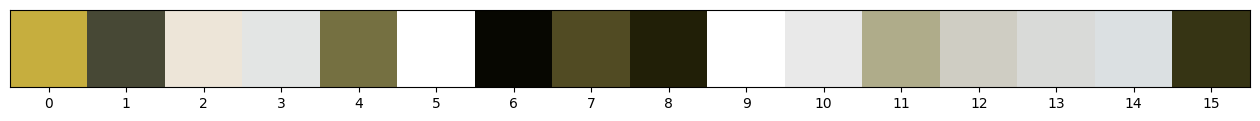

In [10]:
show_centroids_colors(intial_centroids)

Let's run 10 iterarions againts this colors (or centroids) and see what we get 

In [11]:
centroids, idx = run_kMeans(X_img, intial_centroids, intial_idx, 10, True)

K-Means iteration 0/9 | Cost 0.0066
K-Means iteration 1/9 | Cost 0.0062
K-Means iteration 2/9 | Cost 0.0059
K-Means iteration 3/9 | Cost 0.0057
K-Means iteration 4/9 | Cost 0.0056
K-Means iteration 5/9 | Cost 0.0055
K-Means iteration 6/9 | Cost 0.0053
K-Means iteration 7/9 | Cost 0.0053
K-Means iteration 8/9 | Cost 0.0052
K-Means iteration 9/9 | Cost 0.0051


Well, it reduced the cost a little bit. Let see the colors, now: 

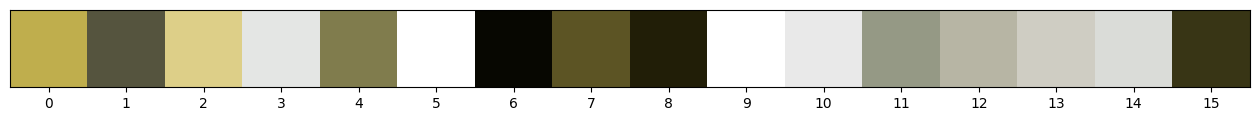

In [12]:
show_centroids_colors(centroids)

## Final result

So, let's convert our image to use the set of color above then, this is our compressed result: 

In [13]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx]

X_recovered = np.reshape(X_recovered, original_img.shape)

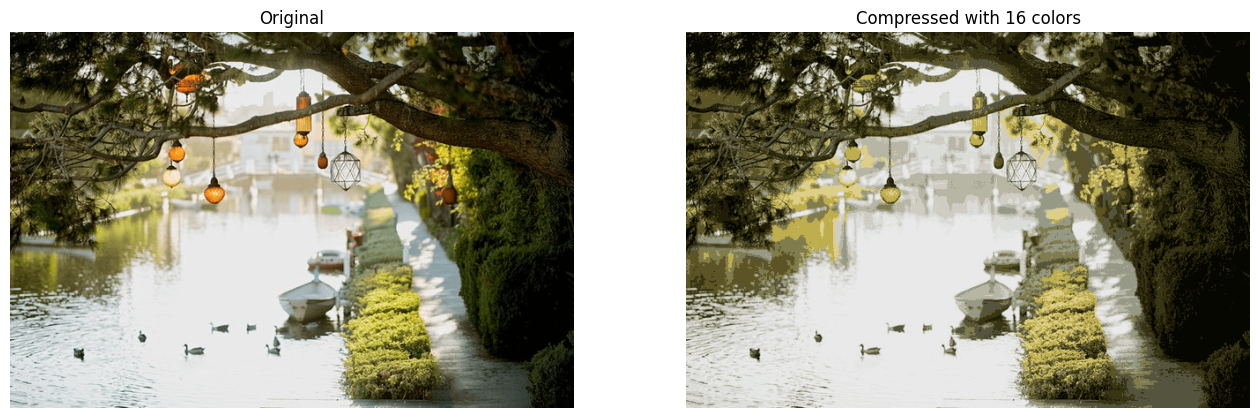

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16, 16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colors'%K)
ax[1].set_axis_off()